# Introduction to Machine Learning Classification Models

Reference:

- https://stackoverflow.com/questions/1859554/what-is-entropy-and-information-gain
- _Python Machine Learning_ https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning-second-edition

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 0. Fitting the Iris Data with Perceptron 

In [6]:
df = pd.read_csv('iris.data',header=None)

In [7]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.groupby([4]).count()
# As we can see in the following table, there are three different Iris types

,0,1,2,3
4,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [14]:
# Create subset for setosa and versicolor

y = df.iloc[0:100, 4].values # values returns the series as array-like
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values

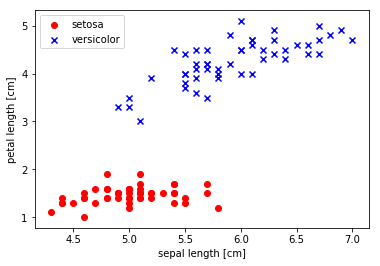

In [17]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1], 
            color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], 
            color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

In [24]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight
        initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """Fit training data.
    
        Parameters
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of 
            samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
    
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
    
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1) 

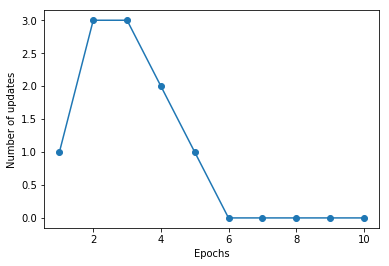

In [34]:
# Fit the perceptron classifier and 
# plot the misclassification errors versus the number of epochs

ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) +1),
         ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [53]:
# function to visualize the decision boundaries for the two dimensional datasets
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y ==cl, 0],
                   y=X[y ==cl, 1],
                   alpha = 0.8,
                   c = colors[idx],
                   marker = markers[idx],
                   label = cl,
                   edgecolor = 'black')
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:,0], X_test[:, 1],
                   c = '', edgecolor = 'black', alpha = 1.0,
                   linewidth = 1, marker = 'o',
                   s = 100, label = 'test set')

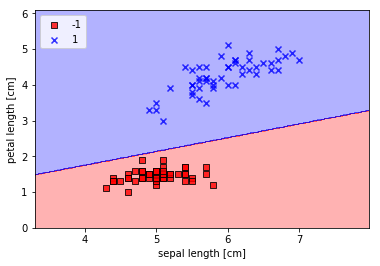

In [32]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

## Standardization in Numpy

In [38]:
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X_std[:,1] - X[:,1].mean())/X[:,1].std()

# 1.0 Classification with scikit-learn

In [39]:
from sklearn import datasets

In [41]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels', np.unique(y))

Class labels [0 1 2]


In [42]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1, stratify = y)

In [43]:
# standardize the features using sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [45]:
# train a perceptron model with scikit-learn
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [47]:
# make a prediction
y_pred = ppn.predict(X_test_std)

# Different Performance Metrics
print('Misclassified samples: %d' %(y_test!=y_pred).sum() )

from sklearn.metrics import accuracy_score
print('Accuracy : %.2f' %accuracy_score(y_test, y_pred))

print('Accuracy: %.2f' %ppn.score(X_test_std, y_test))

Misclassified samples: 3
Accuracy : 0.93
Accuracy: 0.93


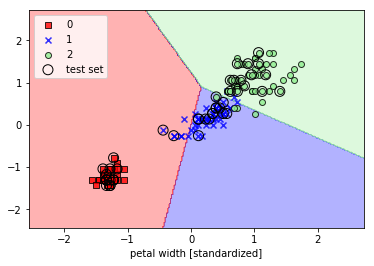

In [57]:
# plot the classification results
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std, y=y_combined,
                     classifier = ppn,
                     test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

The perceptron algorithm never converges on datasets that are not perfectly linearly separable.<br>
It is not recommended in practice.

# 1.1 Logistic Regression

A classification model that is very easy to implement but performs very well on linearly separable classes. <br>

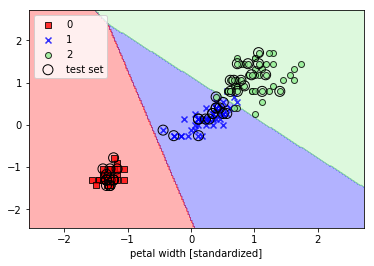

In [71]:
# training a logistic regression model with scikit-learn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state = 1)
# the parameter c here is for regularization
# the smaller c is, the higher the regularization strength
# overfitting is tackled via regularization
lr.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, y=y_combined,
                     classifier = lr,
                     test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

In [64]:
# getting the each observation's probability of belong to each class
lr.predict_proba(X_test_std)
lr.predict_proba(X_test_std).argmax(axis = 1)

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [65]:
# if you want to predict the class label of a single flower sample
# you need to convert a single row entry into a two-dimensional array (as expected by scikit-learn)

lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

# 1.2 Support Vector Machine

- An extension of the perceptron. In perceptron, we minimize misclassification errors. <br>
- In SVM, the optimization objectiveis to maximize the margin. 
- Margin is defined as the distance between the separating hyperplane and the training samples that are closest to this hyperplane.

Intuition: <br>
- Decision Boudaries with large margins tend to have a lower generalization error whereas models with small margins are more prone to overfitting.

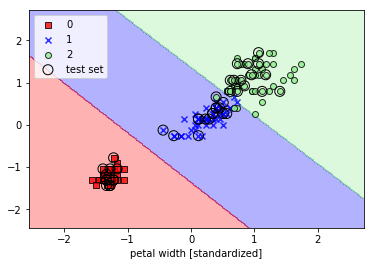

In [75]:
# train SVM model
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1.0, random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, y=y_combined,
                     classifier = svm,
                     test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

## Comparing Logistic Regression with SVM

In practice, both often yield very similar results.

### SVM Pros:
- less prone to outliers
- can be easily kernelized to solve nonlinear classification problems

### Logistic Regression Pros:
- simpler and easier implementation
- can be easily updated so works well for streaming data

#### [Solution when the dataset is large]

SDGClassifier class: supports online learning via the partial_fit method

In [ ]:
# from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss = 'perceptron')
lr = SGDClassifier(loss = 'log')
svm = SGDClassifier(loss = 'hinge')

# 1.3 Decision Tree Learning
- Recommended when we care about interpretability

## Maximizing Information Gain
- Information gain is the difference between the impurity of the parent node and the sum of the child node impurities
- scikit-learn implements a binary decision tree

- Gini impurity
    - a criterion to minimize the probability of misclassification
    - usually yield to similar results as entropy
- Entropy: 
    - is the sum of the probability of each label times the log probability of that same label
    - is a measure of impurity
    - it is 1 if we have a uniform class distribution
- Classification error
    - a useful criterion for pruning but NOT recommended for growing a decision tree

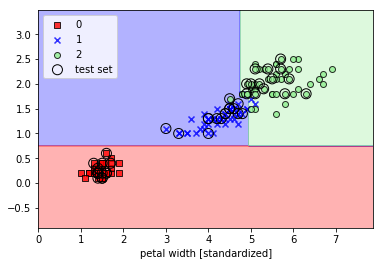

0.9777777777777777

In [97]:
# build a decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 4,
                             random_state = 1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
plot_decision_regions(X = X_combined, y=y_combined,
                     classifier = tree,
                     test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

tree.score(X_test, y_test)

In [84]:
# visualize decision tree
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree,
                          filled = True,
                          rounded = True,
                          class_names = ['Setosa', 'Versicolor', 'Virginica'],
                          feature_names = ['petal length', 'petal width'],
                          out_file = None)
graph = graph_from_dot_data(dot_data)
#graph.write_png('tree.png')
#!!! Problem with running the above line, working on fixing it.

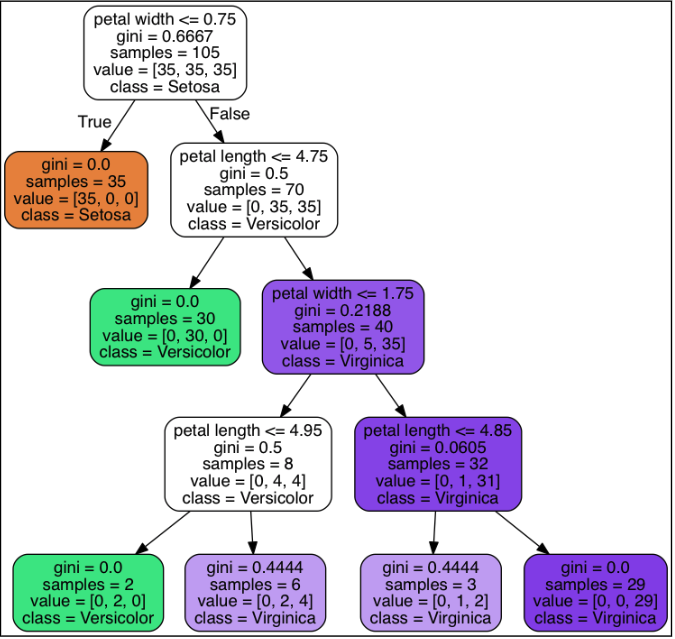

In [93]:
from IPython.display import Image

Image(filename='decision_tree_viz.png')

# If the previous cell runs successfully, it should return the following image

# 1.4 Combining Multiple Decision Trees via Random Forest

## __Random Forest__
- can be considered as an ensemble of decision trees
- average multiple decision trees that individually suffer from high variance, to build a more robust model that has a better generalization performance and is less susceptible to overfitting

### Random Forest Algorithm summarized in 4 Steps:
1. Randomly choose n samples from the training set with replacement (Draw a random bootstrap sample of size n)
2. Grow a decision tree from the bootstrap sample. At each node,
    - Randomly select d features without replacement
    - Split the node using the feature that provides the best split according to the objective function, for insance, miximizing the information gain
3. Repeat the first 2 steps k times
4. Aggregate the prediction by each tree to assign the class label by majority vote
    
### Advantage & Disadvantage of Random Forest:<br>
__Pros__:
    - Don't have to worry so much about choosing good hyperparameter values
    - Only parameter to choose is the number of trees k (in step 3): larger k yields better performance at the expense of increased computational cost
__Cons__:
    - Less interpretability
    
### Parameters
- __Number of trees (k)__ : larger k yields better performance at the expense of increased computational cost
- __Size of the bootstrap sample (n)__: 
    - decreasing the size of n increases the diversity among the infividual trees; shrinking the size of the bootstrap samples may increase randomness of the random forest and it can help to reduce the effect of overfitting
    - smaller bootstrap samples typically result in a lower overall performance of the random forest
    - In most implementations, the size of the bootstrap samples is chosen to be equal to the number of samples in the orifinal training set
- __Number of features at each split (d)__: we want to have d smaller than the total number of features in the training set; usually d = sqrt(m) where m is the number of features in the training set

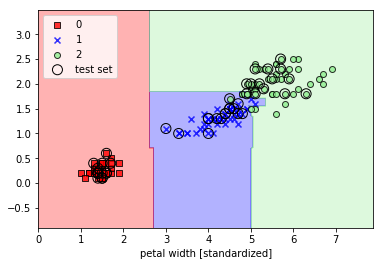

0.9777777777777777

In [99]:
# train RandomForest with scikit-learn
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'gini',
                               n_estimators = 25,
                               random_state = 1,
                               n_jobs = 2)
forest.fit(X_train, y_train)
plot_decision_regions(X = X_combined, y=y_combined,
                     classifier = forest,
                     test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

tree.score(X_test, y_test)

# 1.5 K-nearest neighbors - a lazy learning algorithm


KNN does not learn a discriminative function from the training data, but memorizes the training dataset instead.

__KNN Algorithm summarized__:
1. Choose the number of k and a distance metric
2. Find the k-nearest neighbors of the sample that we want to classify
3. Assign the class label by majority vote

__Advantage & Disadvantage__<br>
Pros:
- the classifier immediately adapts as we collect new training data

Cons:
- Computational Complexity for classifying new samples grows linearly with the number of samples in the training dataset; storage space can become a challenge if we are woking with large datasets
- susceptible to overfitting due to the __curse of dimensionality__

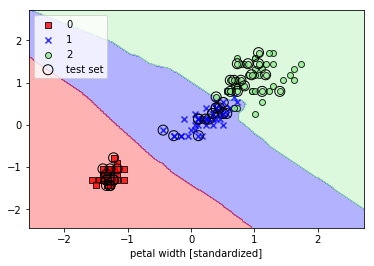

0.9777777777777777

In [102]:
# train KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,
                          p = 2,
                          metric = 'minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, y=y_combined,
                     classifier = knn,
                     test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

tree.score(X_test, y_test)

# Summary

__1. Models that require standardization:__
- Perceptron
- KNN
- Logistic
- SVM

For the Iris dataset, all the models have comparable performance.